In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import string
import nltk

In [ ]:
df = pd.read_csv("data/real_reddit_posts.csv")

In [ ]:
def plot_hist_with_norm(vals, title, xlabel, ylabel):
    figure = plt.figure(figsize=(12, 8))
    plt.grid(b=True)
    n, bins, patches = plt.hist(vals, bins=np.arange(min(vals), max(vals) + 1), density=True)
    mu = np.mean(vals)
    sigma = np.std(vals)
    y = norm.pdf(bins, mu, sigma)
    normal_curve = plt.plot(bins, y, 'r--', linewidth=2, label='Normal Curve')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvline(mu, color='black', linewidth=2, label=f'Mean: {mu}')
    plt.legend()
    plt.show()

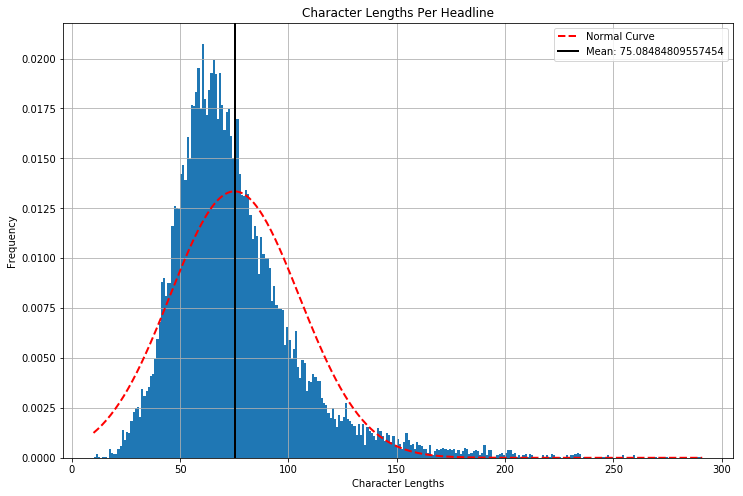

count    15569.000000
mean        75.084848
std         29.891744
min         10.000000
25%         56.000000
50%         69.000000
75%         88.000000
max        291.000000
Name: char_length, dtype: float64


In [ ]:
df["char_length"] = df["title"].apply(lambda x: len(x))
mu = df["char_length"].mean()
sigma = df["char_length"].std()

lengths = sorted(df["char_length"].tolist())
plot_hist_with_norm(lengths, 'Character Lengths Per Headline', 'Character Lengths', 'Frequency')
print(df["char_length"].describe())

In [ ]:
df['word_count'] = df['title'].apply(lambda x: len(nltk.word_tokenize(x)))
word_counts = df['word_count'].tolist()

plot_hist_with_norm(word_counts, '# Words Per Headline', 'Num Words', 'Count')
df['word_count'].describe()

In [ ]:
headlines = df['title'].values.tolist()
starting_words = []
for headline in headlines:
    headline = headline.title()
    headline = headline.replace('Floridaman', 'Florida Man').replace('Floridawoman', 'Florida Woman')
    first_word = nltk.word_tokenize(headline)[0]
    starting_words.append(first_word)
counter = Counter(starting_words)
words, occurrences = zip(*counter.most_common(10))
plt.figure(figsize=(12, 8))
plt.bar(words, occurrences)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Word Counts of First Word")
plt.show()

In [ ]:
punct_count = lambda l1,l2: sum([1 for x in l1 if x in l2])
df['punctuation_count'] = df['title'].apply(lambda x: punct_count(x, set(string.punctuation)))
puncts = df['punctuation_count'].tolist()
plot_hist_with_norm(puncts, 'Punctuation Marks Per Headline', '# Punctuation Marks', 'Frequency')
print(df['punctuation_count'].describe())